In [1]:
import torch
import numpy as np
import uncertainty_toolbox as uct
import uncertainty_toolbox.metrics as umetrics
from uncertainty_toolbox.metrics_calibration import (
    get_proportion_lists_vectorized,
)
import uncertainty_toolbox.viz as uviz
from uncertainty_toolbox.recalibration import iso_recal

from data import data_preprocess
from evaluation import metrics
from model import end2end, end2end_crps

In [2]:
x_train, y_train, x_test, y_test = data_preprocess.data_preprocess('yacht')

In [3]:
y_mean = torch.mean(y_train)
y_sd = torch.std(y_train)

y_train = (y_train - y_mean) / y_sd

In [4]:
end2end_model = end2end_crps.train_model(x_train, y_train, n_epoch = 2000, hidden_layers = [30, 30], learning_rate = 0.001, exp_decay = .998)

initial loss:  1.2091494798660278
1001 0.07077504725897915 tensor(-6.7404, grad_fn=<MeanBackward0>) tensor(0.0217, grad_fn=<MeanBackward0>)
1002 0.05306238185255199 tensor(-6.7434, grad_fn=<MeanBackward0>) tensor(0.0216, grad_fn=<MeanBackward0>)
1003 0.06557655954631379 tensor(-6.7459, grad_fn=<MeanBackward0>) tensor(0.0216, grad_fn=<MeanBackward0>)
1004 0.053081285444234405 tensor(-6.7482, grad_fn=<MeanBackward0>) tensor(0.0216, grad_fn=<MeanBackward0>)
1005 0.06470699432892246 tensor(-6.7501, grad_fn=<MeanBackward0>) tensor(0.0216, grad_fn=<MeanBackward0>)
1006 0.052230623818525515 tensor(-6.7520, grad_fn=<MeanBackward0>) tensor(0.0216, grad_fn=<MeanBackward0>)
1007 0.06393194706994326 tensor(-6.7536, grad_fn=<MeanBackward0>) tensor(0.0216, grad_fn=<MeanBackward0>)
1008 0.053081285444234405 tensor(-6.7550, grad_fn=<MeanBackward0>) tensor(0.0215, grad_fn=<MeanBackward0>)
1009 0.06455576559546311 tensor(-6.7561, grad_fn=<MeanBackward0>) tensor(0.0216, grad_fn=<MeanBackward0>)
1010 0.05

1084 0.053421550094517954 tensor(-6.8184, grad_fn=<MeanBackward0>) tensor(0.0209, grad_fn=<MeanBackward0>)
1085 0.07209829867674858 tensor(-6.8236, grad_fn=<MeanBackward0>) tensor(0.0210, grad_fn=<MeanBackward0>)
1086 0.0537618147448015 tensor(-6.8279, grad_fn=<MeanBackward0>) tensor(0.0209, grad_fn=<MeanBackward0>)
1087 0.0667485822306238 tensor(-6.8313, grad_fn=<MeanBackward0>) tensor(0.0209, grad_fn=<MeanBackward0>)
1088 0.051493383742911146 tensor(-6.8343, grad_fn=<MeanBackward0>) tensor(0.0208, grad_fn=<MeanBackward0>)
1089 0.06474480151228731 tensor(-6.8365, grad_fn=<MeanBackward0>) tensor(0.0209, grad_fn=<MeanBackward0>)
1090 0.05111531190926275 tensor(-6.8385, grad_fn=<MeanBackward0>) tensor(0.0208, grad_fn=<MeanBackward0>)
1091 0.06368620037807182 tensor(-6.8401, grad_fn=<MeanBackward0>) tensor(0.0209, grad_fn=<MeanBackward0>)
1092 0.05111531190926275 tensor(-6.8411, grad_fn=<MeanBackward0>) tensor(0.0208, grad_fn=<MeanBackward0>)
1093 0.06474480151228731 tensor(-6.8417, grad_

1169 0.06393194706994326 tensor(-6.9033, grad_fn=<MeanBackward0>) tensor(0.0203, grad_fn=<MeanBackward0>)
1171 0.06037807183364838 tensor(-6.9100, grad_fn=<MeanBackward0>) tensor(0.0203, grad_fn=<MeanBackward0>)
1173 0.05988657844990548 tensor(-6.9145, grad_fn=<MeanBackward0>) tensor(0.0202, grad_fn=<MeanBackward0>)
1175 0.0597164461247637 tensor(-6.9168, grad_fn=<MeanBackward0>) tensor(0.0202, grad_fn=<MeanBackward0>)
1177 0.05897920604914934 tensor(-6.9175, grad_fn=<MeanBackward0>) tensor(0.0202, grad_fn=<MeanBackward0>)
1179 0.06001890359168241 tensor(-6.9160, grad_fn=<MeanBackward0>) tensor(0.0202, grad_fn=<MeanBackward0>)
1181 0.0631001890359168 tensor(-6.9123, grad_fn=<MeanBackward0>) tensor(0.0202, grad_fn=<MeanBackward0>)
1182 0.05064272211720228 tensor(-6.9090, grad_fn=<MeanBackward0>) tensor(0.0201, grad_fn=<MeanBackward0>)
1183 0.07419659735349714 tensor(-6.9048, grad_fn=<MeanBackward0>) tensor(0.0202, grad_fn=<MeanBackward0>)
1184 0.05572778827977316 tensor(-6.9000, grad_fn

1276 0.08393194706994332 tensor(-6.9316, grad_fn=<MeanBackward0>) tensor(0.0196, grad_fn=<MeanBackward0>)
1277 0.11173913043478258 tensor(-6.9264, grad_fn=<MeanBackward0>) tensor(0.0198, grad_fn=<MeanBackward0>)
1278 0.09022684310018905 tensor(-6.9243, grad_fn=<MeanBackward0>) tensor(0.0196, grad_fn=<MeanBackward0>)
1279 0.1158979206049149 tensor(-6.9227, grad_fn=<MeanBackward0>) tensor(0.0198, grad_fn=<MeanBackward0>)
1280 0.09287334593572781 tensor(-6.9237, grad_fn=<MeanBackward0>) tensor(0.0196, grad_fn=<MeanBackward0>)
1281 0.11442344045368616 tensor(-6.9266, grad_fn=<MeanBackward0>) tensor(0.0197, grad_fn=<MeanBackward0>)
1282 0.08705103969754255 tensor(-6.9330, grad_fn=<MeanBackward0>) tensor(0.0196, grad_fn=<MeanBackward0>)
1283 0.1002457466918714 tensor(-6.9389, grad_fn=<MeanBackward0>) tensor(0.0197, grad_fn=<MeanBackward0>)
1284 0.08028355387523632 tensor(-6.9475, grad_fn=<MeanBackward0>) tensor(0.0196, grad_fn=<MeanBackward0>)
1285 0.08935727788279767 tensor(-6.9553, grad_fn

1419 0.057107750472589786 tensor(-7.0854, grad_fn=<MeanBackward0>) tensor(0.0187, grad_fn=<MeanBackward0>)
1421 0.053478260869565225 tensor(-7.0941, grad_fn=<MeanBackward0>) tensor(0.0187, grad_fn=<MeanBackward0>)
1447 0.053629489603024584 tensor(-7.1107, grad_fn=<MeanBackward0>) tensor(0.0186, grad_fn=<MeanBackward0>)
1449 0.05644612476370509 tensor(-7.1063, grad_fn=<MeanBackward0>) tensor(0.0186, grad_fn=<MeanBackward0>)
1451 0.05824196597353496 tensor(-7.1021, grad_fn=<MeanBackward0>) tensor(0.0186, grad_fn=<MeanBackward0>)
1453 0.06413988657844988 tensor(-7.0980, grad_fn=<MeanBackward0>) tensor(0.0186, grad_fn=<MeanBackward0>)
1455 0.06542533081285443 tensor(-7.0953, grad_fn=<MeanBackward0>) tensor(0.0186, grad_fn=<MeanBackward0>)
1457 0.06476370510396973 tensor(-7.0966, grad_fn=<MeanBackward0>) tensor(0.0186, grad_fn=<MeanBackward0>)
1459 0.063289224952741 tensor(-7.1007, grad_fn=<MeanBackward0>) tensor(0.0186, grad_fn=<MeanBackward0>)
1461 0.058620037807183355 tensor(-7.1066, gra

End2end test MAPE:  0.31265265
End2end test RMSE:  1.4802235
End2end test NLLK:  6.8534365
End2end test CRPS:  tensor(0.6459)


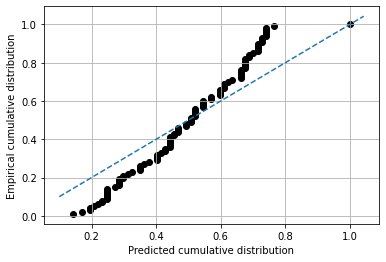

End2end test calibration error when step size is 0.001:  13.407767161410018
End2end test calibration error when step size is 0.01:  1.3069514251981786
End2end test calibration error when step size is 0.1:  0.1024540394670265


In [5]:
mean_pred, var_pred = end2end_model(x_test)
mean_pred = mean_pred.detach().numpy() * y_sd.detach().numpy()+ y_mean.detach().numpy()
var_pred = var_pred.detach().numpy() * torch.pow(y_sd, 2).detach().numpy()
sd_pred = np.sqrt(var_pred)

print('End2end test MAPE: ', metrics.mape(y_test.detach().numpy(), mean_pred))
print('End2end test RMSE: ', metrics.rmse(y_test.detach().numpy(), mean_pred))
print('End2end test NLLK: ', metrics.nllk(y_test.detach().numpy(), mean_pred, var_pred))
print('End2end test CRPS: ', metrics.CRPSMetric(x = y_test.squeeze(dim = 1), loc = torch.tensor(mean_pred).squeeze(dim = 1), scale = torch.tensor(sd_pred).squeeze(dim = 1)).gaussian_crps().mean())

pcdf = metrics.pcdf(mean_pred.squeeze(1), var_pred.squeeze(1), y_test.detach().numpy().squeeze(1))
metrics.draw_pcdf(pcdf)
print('End2end test calibration error when step size is 0.001: ', metrics.calibration_error(pcdf, step = 0.001))
print('End2end test calibration error when step size is 0.01: ', metrics.calibration_error(pcdf, step = 0.01))
print('End2end test calibration error when step size is 0.1: ', metrics.calibration_error(pcdf, step = 0.1))

In [6]:
print(uct.metrics.get_all_metrics(mean_pred.squeeze(1), sd_pred.squeeze(1), y_test.detach().numpy().squeeze(1)))

 (1/n) Calculating accuracy metrics
 (2/n) Calculating average calibration metrics


 20%|████████▌                                  | 2/10 [00:00<00:00, 12.46it/s]

 (3/n) Calculating adversarial group calibration metrics
  [1/2] for mean absolute calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


 20%|████████▌                                  | 2/10 [00:00<00:00, 12.15it/s]

  [2/2] for root mean squared calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 11.98it/s]

 (4/n) Calculating sharpness metrics
 (n/n) Calculating proper scoring rule metrics
**Finished Calculating All Metrics**


===================== Accuracy Metrics =====================
  MAE           0.762
  RMSE          1.480
  MDAE          0.353
  MARPD         23.861
  R2            0.993
  Correlation   0.997
=============== Average Calibration Metrics ================
  Root-mean-squared Calibration Error   0.227
  Mean-absolute Calibration Error       0.196
  Miscalibration Area                   0.198
========== Adversarial Group Calibration Metrics ===========
  Mean-absolute Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.341
     Group Size: 0.56 -- Calibration Error: 0.251
     Group Size: 1.00 -- Calibration Error: 0.196
  Root-mean-squared Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.404
     Group Size: 0.56 -- Calibration Error: 0.283
     Group Size: 1.00 -- Calibration Error: 0.227
===============

Lims is None. Setting lims now:
min_max_true: (0.08, 62.42)
min_max_pred: (-0.065917015, 61.084923)
lims: (-0.065917015, 62.42)
lims_ext: (-6.314508628845215, 68.66858978271485)


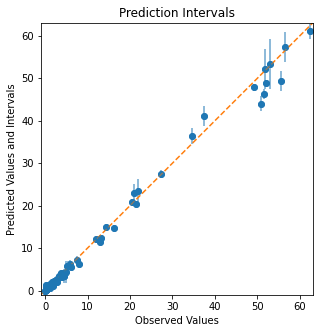

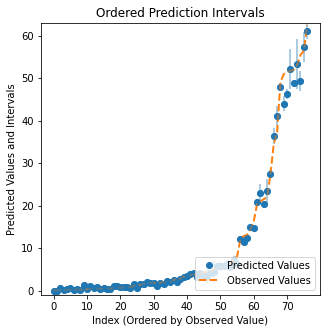

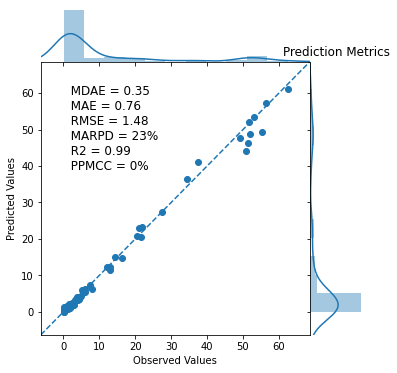

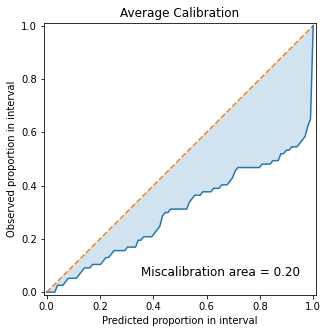

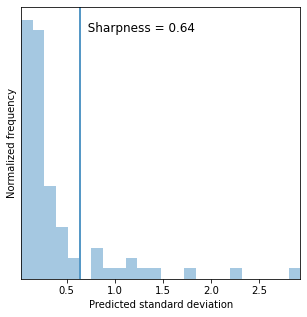

In [7]:
y = y_test.detach().numpy().squeeze(1)

uviz.plot_intervals(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_intervals_ordered(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_parity(mean_pred.squeeze(1), y)
uviz.plot_calibration(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_sharpness(sd_pred.squeeze(1))